# import

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import joblib
from tqdm import tqdm

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB as gnb # 설명변수가 연속형인 데이터에 사용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [69]:
print('numpy version: ',np.__version__)
print('pandas version: ',pd.__version__)
print('scikit-learn version: ',sklearn.__version__)
print('matplotlib version: ',matplotlib.__version__)
print('seaborn version: ',sns.__version__)
print('joblib version: ',joblib.__version__)

numpy version:  1.23.4
pandas version:  1.5.1
scikit-learn version:  1.1.3
matplotlib version:  3.5.3
seaborn version:  0.12.0
joblib version:  1.1.1


In [70]:
dts=pd.read_csv('final_of_final_preprocessing.csv')

In [71]:
# 충전기가 설치된 950개의 데이터 추출
df_train_1=dts[dts['충전기 유무']==1]
# 충전기가 설치되지 않은 데이터 중 랜덤하게 950개의 데이터 추출
df_train_2=dts[dts['충전기 유무']==0].sample(950)
df_train=pd.concat([df_train_1,df_train_2])

In [72]:
# 평가 데이터 feature, label 분리
feature_tr=df_train[df_train.columns[:-1]]
label_tr=df_train['충전기 유무']

In [73]:
# 평가 데이터를 학습, 테스트 데이터로 분리(6/4)
train_x,test_x,train_y,test_y = train_test_split(feature_tr,label_tr, test_size=.4, random_state=42)

In [74]:
model1=LogisticRegression()
model2=gnb()
model3=KNeighborsClassifier()
model4=rfc()

params={
    'max_iter':[50,100,200,300],
    'solver':['lbfgs','sag','saga','newton-cg'],
    'C':[.001,.01,.1,1,10],
    'penalty':['l1','l2']
}
params2={
    'var_smoothing':np.arange(-9,1)
}
params3={
    'n_neighbors' : [2],
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}
params4={
    'n_estimators':[50,100,200,300],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}

In [75]:
cv_lg=GridSearchCV(estimator=model1, param_grid=params, cv=5, scoring='accuracy', refit=True)
cv_gnb=GridSearchCV(estimator=model2, param_grid=params2, cv=5, scoring='accuracy', refit=True)
cv_knn=GridSearchCV(estimator=model3, param_grid=params3, cv=5, scoring='accuracy', refit=True)
cv_rfc=GridSearchCV(estimator=model4, param_grid=params4, cv=5, scoring='accuracy', refit=True)

In [76]:
cv_lg.fit(feature_tr,label_tr)
cv_gnb.fit(feature_tr,label_tr)
cv_knn.fit(feature_tr,label_tr)
cv_rfc.fit(feature_tr,label_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [77]:
print('LogisticRegression')
print('best parameters:',cv_lg.best_params_)
print('best score:',round(cv_lg.best_score_,2))
print('-'*40)
print('GaussianNB')
print('best parameters:',cv_gnb.best_params_)
print('best score:',round(cv_gnb.best_score_,2))
print('-'*40)
print('KNeighborsClassifier')
print('best parameters:',cv_knn.best_params_)
print('best score:',round(cv_knn.best_score_,2))
print('-'*40)
print('RandomForestClassifier')
print('best parameters:',cv_rfc.best_params_)
print('best score:',round(cv_rfc.best_score_,2))

LogisticRegression
best parameters: {'C': 0.001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
best score: 0.68
----------------------------------------
GaussianNB
best parameters: {'var_smoothing': -9}
best score: 0.5
----------------------------------------
KNeighborsClassifier
best parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
best score: 0.52
----------------------------------------
RandomForestClassifier
best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
best score: 0.66


In [78]:
estimator_lr=cv_lg.best_estimator_
estimator_gnb=cv_gnb.best_estimator_
estimator_knn=cv_knn.best_estimator_
estimator_rfc=cv_rfc.best_estimator_

In [84]:
pred_lr=estimator_lr.predict(test_x)
pred_gnb=estimator_gnb.predict(test_x)
pred_knn=estimator_knn.predict(test_x)
pred_rfc=estimator_rfc.predict(test_x)

print('lr acc:', round(accuracy_score(test_y,pred_lr),2))
print('gnb acc:', round(accuracy_score(test_y,pred_gnb),2))
print('knn acc:', round(accuracy_score(test_y,pred_knn),2))
print('rfc acc:', round(accuracy_score(test_y,pred_rfc),2))

lr acc: 0.68
gnb acc: 0.49
knn acc: 0.63
rfc acc: 0.72


In [85]:
# 모델 저장
joblib.dump(estimator_lr, './model_testing/lr1.pkl')
joblib.dump(estimator_gnb, './model_testing/gnb1.pkl')
joblib.dump(estimator_knn, './model_testing/knn1.pkl')
joblib.dump(estimator_rfc, './model_testing/rfc1.pkl')

['./model_testing/rfc1.pkl']

# -------------------------------------------

In [ ]:
pred_lr=estimator_lr.predict(test_x)
pred_gnb=estimator_gnb.predict(test_x)
pred_knn=estimator_knn.predict(test_x)
pred_rfc=estimator_rfc.predict(test_x)

print('lr acc:', round(accuracy_score(test_y,pred_lr),2))
print('gnb acc:', round(accuracy_score(test_y,pred_gnb),2))
print('knn acc:', round(accuracy_score(test_y,pred_knn),2))
print('rfc acc:', round(accuracy_score(test_y,pred_rfc),2))

# --------------------------------------------------------

In [86]:
feature=dts[dts.columns[:-1]]
label=dts['충전기 유무']

In [87]:
cls_pred=estimator_rfc.predict(feature)

In [90]:
df_pred=pd.DataFrame(cls_pred,index=feature.index,columns=['충전기 유무'])
df_real=pd.DataFrame(label,columns=['충전기 유무'])

df_clustering=df_real[np.logical_and(df_real['충전기 유무']==0,df_pred['충전기 유무']==1)]

In [92]:
df=pd.read_csv('final_2/final_of_final.csv')

In [94]:
index_cls=df_clustering.index

In [99]:
df_clustering['위도']=df.iloc[index_cls]['위도_Lat']
df_clustering['경도']=df.iloc[index_cls]['경도_Lng']

In [100]:
df_clustering.head(1)

,충전기 유무,위도,경도
8449,0,33.419,126.313


In [101]:
df_clustering.drop('충전기 유무',axis=1, inplace=True)

In [103]:
df_clustering.head()

,위도,경도
8449,33.419,126.313
9347,33.447,126.308
9496,33.448,126.307
9625,33.448,126.436
9797,33.461,126.312


In [106]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [108]:
x=pd.concat([df_clustering['경도'].astype(float),df_clustering['위도'].astype(float)],axis=1).to_numpy()

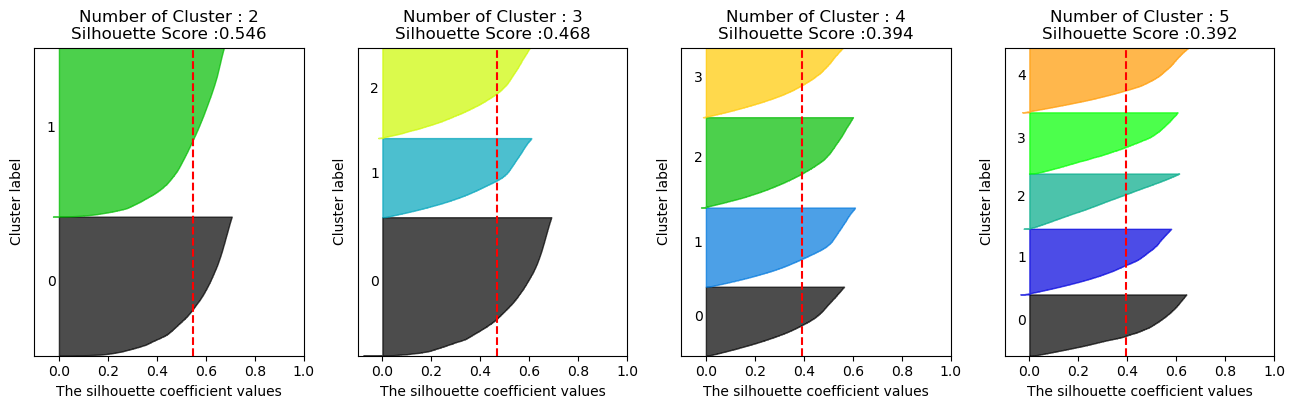

In [109]:
visualize_silhouette([2,3,4,5], x)

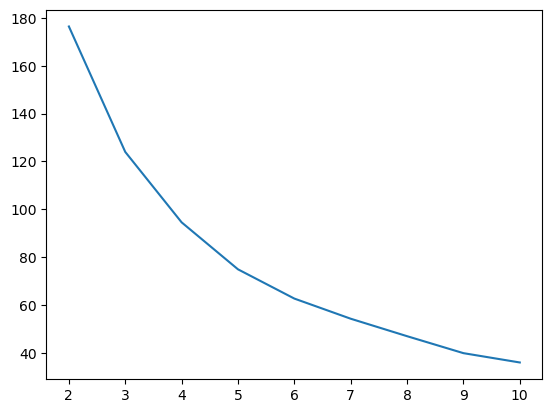

In [114]:
def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        k_means = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        k_means.fit(X_features)
        inertias.append(k_means.inertia_)
        
    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], x)

In [105]:
df_jj=df[['위도_Lat','경도_Lng']]

In [116]:
df_test1=df_clustering.copy()
df_test2=df_clustering.copy()

In [117]:
# kmeans클러스터링 + 4개의 군집 사용

kmeans=KMeans(n_clusters=4, init='k-means++', max_iter=200, random_state=42)
cluster_labels=kmeans.fit_predict(df_clustering)

kmeans2=KMeans(n_clusters=10, init='k-means++', max_iter=200, random_state=42)
cluster_labels2=kmeans.fit_predict(df_clustering)

df_test1['kmean_labels']=cluster_labels
df_test2['kmean_labels']=cluster_labels2

In [120]:
df_test1.columns

Index(['위도', '경도', 'kmean_labels'], dtype='object')

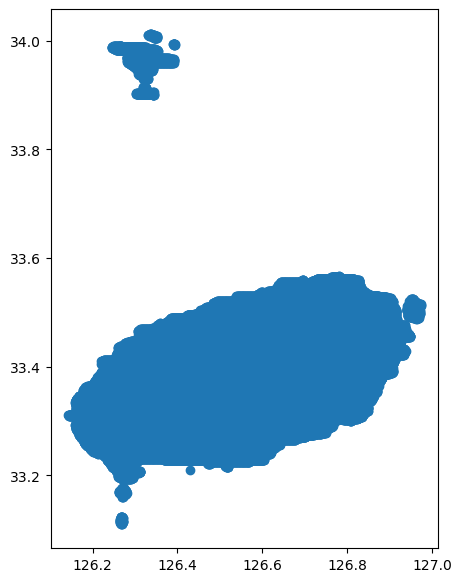

In [127]:
plt.figure(figsize=(5,7))
plt.scatter(df_jj['경도_Lng'].astype(float),df_jj['위도_Lat'].astype(float))

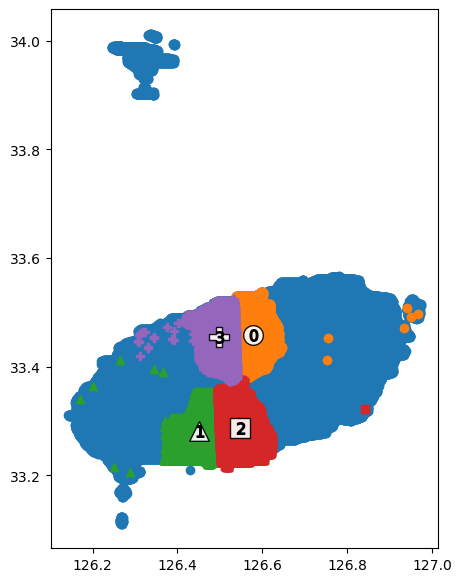

In [133]:
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)

markers=['o','^','s','P','D','H','x']

plt.figure(figsize=(5,7))
plt.scatter(df_jj['경도_Lng'].astype(float),df_jj['위도_Lat'].astype(float))
for label in unique_labels:
    label_cluster=df_test1[df_test1['kmean_labels']==label]
    center_x_y=centers[label]

    plt.scatter(x=label_cluster['경도'].astype(float),
                y=label_cluster['위도'].astype(float),
                marker=markers[label])

    plt.scatter(x=center_x_y[1],y=center_x_y[0], s=200, color='white', alpha=.9, edgecolor='k',marker=markers[label])
    plt.scatter(x=center_x_y[1],y=center_x_y[0], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [141]:
dts

,침수우려여부,지진 발생,cctv 유무,합산 검색 수,내국인 관광객수,외국인 관광객수,전년대비 증감대수,전년대비 증감율(%),2122인구증감율,2122경제활동인구증감율,2021전기차비율,2022전기차비율,2122전기차증감율,2개년 통계_1,2개년 통계_2,충전기 유무
0,0,0,0,0.0,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,1
1,0,0,0,0.0,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,1
2,0,0,0,0.0,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,1
3,0,0,0,0.0,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,1
4,0,0,0,0.0,0.0,0.0,0.276893,0.484701,0.280973,0.635659,0.785802,0.820669,0.890143,-0.622198,-0.037425,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97940,0,0,1,0.0,0.0,0.0,0.333662,0.409769,0.511062,0.768734,0.730722,0.757852,0.930634,-0.302885,0.378726,0
97941,0,0,1,0.0,0.0,0.0,0.763582,0.470721,0.471239,0.758398,0.369645,0.367781,0.926983,1.922094,-0.097575,0
97942,0,0,1,0.0,0.0,0.0,0.308776,0.512941,0.672566,0.877261,0.789474,0.827761,0.966147,-0.597325,-0.048238,0
97943,0,0,1,0.0,0.0,0.0,0.308776,0.512941,0.672566,0.877261,0.789474,0.827761,0.966147,-0.597325,-0.048238,0
